# Import Necessary Libraries

In [1206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
from datetime import date as dt
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE, f_oneway, f_regression, SelectKBest
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1207]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

# Import the Dataset

In [1208]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL        65.00     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace      196.00        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd      2003.00          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL        80.00     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None        0.00        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd      1976.00          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL        68.00    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace      162.00        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd      2001.00          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL        60.00     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None        0.00        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [1209]:
df.shape

(1460, 81)

In [1210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Profile Report

In [1211]:
# report = pandas_profiling.ProfileReport(df)
# report.to_file('report.html')

# Split the categorical and numerical Data

In [1212]:
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(exclude = 'object')
print(df_cat.shape, df_num.shape)

(1460, 43) (1460, 38)


In [1213]:
# Drop unique value
df_num.drop(['Id'], axis = 1, inplace = True)

# Percentage of missing values in continuous variable

In [1214]:
(df_num.isnull().sum()/df_num.shape[0]*100)[df_num.isnull().sum()/df_num.shape[0]*100>0]

LotFrontage   17.74
MasVnrArea     0.55
GarageYrBlt    5.55
dtype: float64

> LotFrontage: Linear feet of street connected to property

> MasVnrArea: Masonry veneer area in square feet
    
> GarageYrBlt: Year garage was built

In [1215]:
df_num.drop(['GarageYrBlt'], axis = 1, inplace = True)

In [1216]:
def missing(x):
    x = x.fillna(x.median())
    return x

In [1217]:
df_num = df_num.apply(missing)

# Percentage of missing values in categorical variable

In [1218]:
(df_cat.isnull().sum()/df_cat.shape[0]*100)[df_cat.isnull().sum()/df_cat.shape[0]*100>0]

Alley          93.77
MasVnrType      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
FireplaceQu    47.26
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

> Alley: Type of alley access to property

> MasVnrArea: Masonry veneer area in square feet

> BsmtQual: Evaluates the height of the basement

> BsmtCond: Evaluates the general condition of the basement

> BsmtExposure: Refers to walkout or garden level walls

In [1219]:
for i in df_cat.columns:
    if i == 'Electrical':
        continue
    df_cat[i] = df_cat[i].fillna('No')

In [1220]:
df_cat['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1221]:
df_cat[df_cat['Electrical'].isnull()]

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition
1379       RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl       Timber       Norm       Norm     1Fam       SLvl     Gable  CompShg     VinylSd     VinylSd       None        TA        TA      PConc       Gd       TA           No          Unf          Unf    GasA        Gd          Y        NaN          Gd        Typ          No    BuiltIn          Fin         TA         TA          Y     No    No          No       WD        Normal

In [1222]:
df_cat['Electrical'] = df_cat['Electrical'].fillna('Mix')

In [1223]:
df_cat

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition
0          RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          No     Attchd          RFn         TA         TA          Y     No     No          No       WD        Normal
1          RL   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd          RFn         TA         TA          Y     No     No          No       WD        Normal
2          RL   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y     No     No          No       WD        Normal
3          RL   Pave    No      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr          Gd        Typ          Gd     Detchd          Unf         TA         TA          Y     No     No          No       WD       Abnorml
4          RL   Pave    No      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y     No     No          No       WD        Normal
...       ...    ...   ...      ...         ...       ...       ...       ...          ...        ...        ...      ...        ...       ...      ...         ...         ...        ...       ...       ...        ...      ...      ...          ...          ...          ...     ...       ...        ...        ...         ...        ...         ...        ...          ...        ...        ...        ...    ...    ...         ...      ...           ...
1455       RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd       None        TA        TA      PConc       Gd       TA           No          Unf          Unf    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd          RFn         TA         TA          Y     No     No          No       WD        Normal
1456       RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story     Gable  CompShg     Plywood     Plywood      Stone        TA        TA     CBlock       Gd       TA           No          ALQ          Rec    GasA        TA          Y      SBrkr          TA       Min1          TA     Att

In [1224]:
df_num

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0             60        65.00     8450            7            5       2003          2003      196.00         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0           2         548           0           61              0          0            0         0        0       2    2008     208500
1             20        80.00     9600            6            8       1976          1976        0.00         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1           2         460         298            0              0          0            0         0        0       5    2007     181500
2             60        68.00    11250            7            5       2001          2002      162.00         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1           2         608           0           42              0          0            0         0        0       9    2008     223500
3             70        60.00     9550            7            5       1915          1970        0.00         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1           3         642           0           35            272          0            0         0        0       2    2006     140000
4             60        84.00    14260            8            5       2000          2000      350.00         655           0        490         1145      1145      1053             0       2198             1             0         2         1             4             1             9           1           3         836         192           84              0          0            0         0        0      12    2008     250000
...          ...          ...      ...          ...          ...        ...           ...         ...         ...         ...        ...          ...       ...       ...           ...        ...           ...           ...       ...       ...           ...           ...           ...         ...         ...         ...         ...          ...            ...        ...          ...       ...      ...     ...     ...        ...
1455          60        62.00     7917            6            5       1999          2000        0.00           0           0        953          953       953       694             0       1647             0             0         2         1             3             1             7           1           2         460           0           40              0          0            0         0        0       8    2007     175000
1456          20        85.00    13175            6            6       1978          1988      119.00         790         163        589         1542      2073         0             0       2073             1             0         2         0             3             1             7           2           2         500         349            0              0          0            0         0        0       2    2010     210000
1457          70        66.00     9042            7            9       1941          2006        0.00         275           0  

# Deriving new Feature

In [1225]:
df_num['No_years_old'] = dt.today().year - pd.to_datetime(df_num['YearBuilt'], format = '%Y').dt.year

In [1226]:
df_num['No_years_after_remodel'] = df_num['YearRemodAdd'] - df_num['YearBuilt']

# Drop unwanted columns

In [1227]:
df_num.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis = 1, inplace = True)

# Data Summary

In [1228]:
df_num.describe()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  No_years_old  No_years_after_remodel
count     1460.00      1460.00   1460.00      1460.00      1460.00     1460.00     1460.00     1460.00    1460.00      1460.00   1460.00   1460.00       1460.00    1460.00       1460.00       1460.00   1460.00   1460.00       1460.00       1460.00       1460.00     1460.00     1460.00     1460.00     1460.00      1460.00        1460.00    1460.00      1460.00   1460.00  1460.00 1460.00    1460.00       1460.00                 1460.00
mean        56.90        69.86  10516.83         6.10         5.58      103.12      443.64       46.55     567.24      1057.43   1162.63    346.99          5.84    1515.46          0.43          0.06      1.57      0.38          2.87          1.05          6.52        0.61        1.77      472.98       94.24        46.66          21.95       3.41        15.06      2.76    43.49    6.32  180921.20         48.73                   13.60
std         42.30        22.03   9981.26         1.38         1.11      180.73      456.10      161.32     441.87       438.71    386.59    436.53         48.62     525.48          0.52          0.24      0.55      0.50          0.82          0.22          1.63        0.64        0.75      213.80      125.34        66.26          61.12      29.32        55.76     40.18   496.12    2.70   79442.50         30.20                   24.48
min         20.00        21.00   1300.00         1.00         1.00        0.00        0.00        0.00       0.00         0.00    334.00      0.00          0.00     334.00          0.00          0.00      0.00      0.00          0.00          0.00          2.00        0.00        0.00        0.00        0.00         0.00           0.00       0.00         0.00      0.00     0.00    1.00   34900.00         10.00                    0.00
25%         20.00        60.00   7553.50         5.00         5.00        0.00        0.00        0.00     223.00       795.75    882.00      0.00          0.00    1129.50          0.00          0.00      1.00      0.00          2.00          1.00          5.00        0.00        1.00      334.50        0.00         0.00           0.00       0.00         0.00      0.00     0.00    5.00  129975.00         20.00                    0.00
50%         50.00        69.00   9478.50         6.00         5.00        0.00      383.50        0.00     477.50       991.50   1087.00      0.00          0.00    1464.00          0.00          0.00      2.00      0.00          3.00          1.00          6.00        1.00        2.00      480.00        0.00        25.00           0.00       0.00         0.00      0.00     0.00    6.00  163000.00         47.00                    0.00
75%         70.00        79.00  11601.50         7.00         6.00      164.25      712.25        0.00     808.00      1298.25   1391.25    728.00          0.00    1776.75          1.00          0.00      2.00      1.00          3.00          1.00          7.00        1.00        2.00      576.00      168.00        68.00           0.00       0.00         0.00      0.00     0.00    8.00  214000.00         66.00                   20.00
max        190.00       313.00 215245.00        10.00         9.00     1600.00     5644.00     1474.00    2336.00      6110.00   4692.00   2065.00        572.00    5642.00          3.00          2.00      3.00      2.00          8.00          3.00         14.00        3.00        4.00     1418.00      857.00       547.00         552.00     508.00       480.00    738.00 15500.00   12.00  755000.00        148.00                  123.00

In [1229]:
df_cat.describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition
count      1460   1460  1460     1460        1460      1460      1460      1460         1460       1460       1460     1460       1460      1460     1460        1460        1460       1460      1460      1460       1460     1460     1460         1460         1460         1460    1460      1460       1460       1460        1460       1460        1460       1460         1460       1460       1460       1460   1460  1460        1460     1460          1460
unique        5      2     3        4           4         2         5         3           25          9          8        5          8         6        8          15          16          5         4         5          6        5        5            4            7            7       6         5          2          5           4          7           6          7            4          6          6          3      4     5           5        9             6
top          RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam     1Story     Gable  CompShg     VinylSd     VinylSd       None        TA        TA      PConc       TA       TA           No          Unf          Unf    GasA        Ex          Y      SBrkr          TA        Typ          No     Attchd          Unf         TA         TA          Y     No    No          No       WD        Normal
freq       1151   1454  1369      925        1311      1459      1052      1382          225       1260       1445     1220        726      1141     1434         515         504        864       906      1282        647      649     1311          991          430         1256    1428       741       1365       1334         735       1360         690        870          605       1311       1326       1340   1453  1179        1406     1267          1198

In [1230]:
def summary(x):
    return pd.Series([x.count(), x.mean(), x.std(), x.min(), x.quantile(0.25), x.quantile(0.50), x.quantile(0.75), 
                      x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max()], 
                     index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', '90%', '95%', '99%', 'max'])

In [1231]:
df_num.apply(summary)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  No_years_old  No_years_after_remodel
count     1460.00      1460.00   1460.00      1460.00      1460.00     1460.00     1460.00     1460.00    1460.00      1460.00   1460.00   1460.00       1460.00    1460.00       1460.00       1460.00   1460.00   1460.00       1460.00       1460.00       1460.00     1460.00     1460.00     1460.00     1460.00      1460.00        1460.00    1460.00      1460.00   1460.00  1460.00 1460.00    1460.00       1460.00                 1460.00
mean        56.90        69.86  10516.83         6.10         5.58      103.12      443.64       46.55     567.24      1057.43   1162.63    346.99          5.84    1515.46          0.43          0.06      1.57      0.38          2.87          1.05          6.52        0.61        1.77      472.98       94.24        46.66          21.95       3.41        15.06      2.76    43.49    6.32  180921.20         48.73                   13.60
std         42.30        22.03   9981.26         1.38         1.11      180.73      456.10      161.32     441.87       438.71    386.59    436.53         48.62     525.48          0.52          0.24      0.55      0.50          0.82          0.22          1.63        0.64        0.75      213.80      125.34        66.26          61.12      29.32        55.76     40.18   496.12    2.70   79442.50         30.20                   24.48
min         20.00        21.00   1300.00         1.00         1.00        0.00        0.00        0.00       0.00         0.00    334.00      0.00          0.00     334.00          0.00          0.00      0.00      0.00          0.00          0.00          2.00        0.00        0.00        0.00        0.00         0.00           0.00       0.00         0.00      0.00     0.00    1.00   34900.00         10.00                    0.00
25%         20.00        60.00   7553.50         5.00         5.00        0.00        0.00        0.00     223.00       795.75    882.00      0.00          0.00    1129.50          0.00          0.00      1.00      0.00          2.00          1.00          5.00        0.00        1.00      334.50        0.00         0.00           0.00       0.00         0.00      0.00     0.00    5.00  129975.00         20.00                    0.00
50%         50.00        69.00   9478.50         6.00         5.00        0.00      383.50        0.00     477.50       991.50   1087.00      0.00          0.00    1464.00          0.00          0.00      2.00      0.00          3.00          1.00          6.00        1.00        2.00      480.00        0.00        25.00           0.00       0.00         0.00      0.00     0.00    6.00  163000.00         47.00                    0.00
75%         70.00        79.00  11601.50         7.00         6.00      164.25      712.25        0.00     808.00      1298.25   1391.25    728.00          0.00    1776.75          1.00          0.00      2.00      1.00          3.00          1.00          7.00        1.00        2.00      576.00      168.00        68.00           0.00       0.00         0.00      0.00     0.00    8.00  214000.00         66.00                   20.00
90%        120.00        92.00  14381.70         8.00         7.00      335.00     1065.50      117.20    1232.00      1602.20   1680.00    954.20          0.00    2158.30          1.00          0.00      2.00      1.00          4.00          1.00          9.00        1.00        3.00      757.10      262.00       130.00         112.00       0.00         0.00      0.00     0.00   10.00  278000.00         95.10                   51.00
95%        160.00       104.00  17401.15         8.00         8.0

# Outliers Capping

In [1232]:
# def outlier_capping(x):
#     x = x.clip(upper = x.quantile(0.99))
#     x = x.clip(lower = x.quantile(0.01)) 
#     return x

In [1233]:
# df_num = df_num.apply(outlier_capping)

In [1234]:
# df_num.apply(summary)

In [1235]:
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

# Label Encoding

In [1236]:
lst = []
for i in df_cat.columns:
    v = df_cat[i].value_counts()
    lst.append(v)
    print(v)
    print('-'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------------------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------------------------------
No      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
--------------------------------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------------------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
--------------------------------------------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
---------------------------

# Merge the cat and cont variables

In [1237]:
df1 = pd.concat([df_num, df_cat], axis = 1)
df1.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  No_years_old  No_years_after_remodel MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition
0          60        65.00     8450            7            5      196.00         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0           2         548           0           61              0          0            0         0        0       2     208500            17                       0       RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          No     Attchd          RFn         TA         TA          Y     No    No          No       WD        Normal
1          20        80.00     9600            6            8        0.00         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1           2         460         298            0              0          0            0         0        0       5     181500            44                       0       RL   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd          RFn         TA         TA          Y     No    No          No       WD        Normal
2          60        68.00    11250            7            5      162.00         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1           2         608           0           42              0          0            0         0        0       9     223500            19                       1       RL   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y     No    No          No       WD        Normal
3          70        60.00     9550            7            5        0.00         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1           3         642           0           35            272          0            0         0        0       2     140000           105                      55       RL   Pave    No      IR1        

# Coefficient of variance

In [1238]:
cv = np.mean(df1)/np.std(df1)
cv

MSSubClass               1.35
LotFrontage              3.17
LotArea                  1.05
OverallQual              4.41
OverallCond              5.01
MasVnrArea               0.57
BsmtFinSF1               0.97
BsmtFinSF2               0.29
BsmtUnfSF                1.28
TotalBsmtSF              2.41
1stFlrSF                 3.01
2ndFlrSF                 0.80
LowQualFinSF             0.12
GrLivArea                2.88
BsmtFullBath             0.82
BsmtHalfBath             0.24
FullBath                 2.84
HalfBath                 0.76
BedroomAbvGr             3.51
KitchenAbvGr             4.75
TotRmsAbvGrd             4.01
Fireplaces               0.95
GarageCars               2.37
GarageArea               2.21
WoodDeckSF               0.75
OpenPorchSF              0.70
EnclosedPorch            0.36
3SsnPorch                0.12
ScreenPorch              0.27
PoolArea                 0.07
MiscVal                  0.09
MoSold                   2.34
SalePrice                2.28
No_years_o

# Correlation Analysis

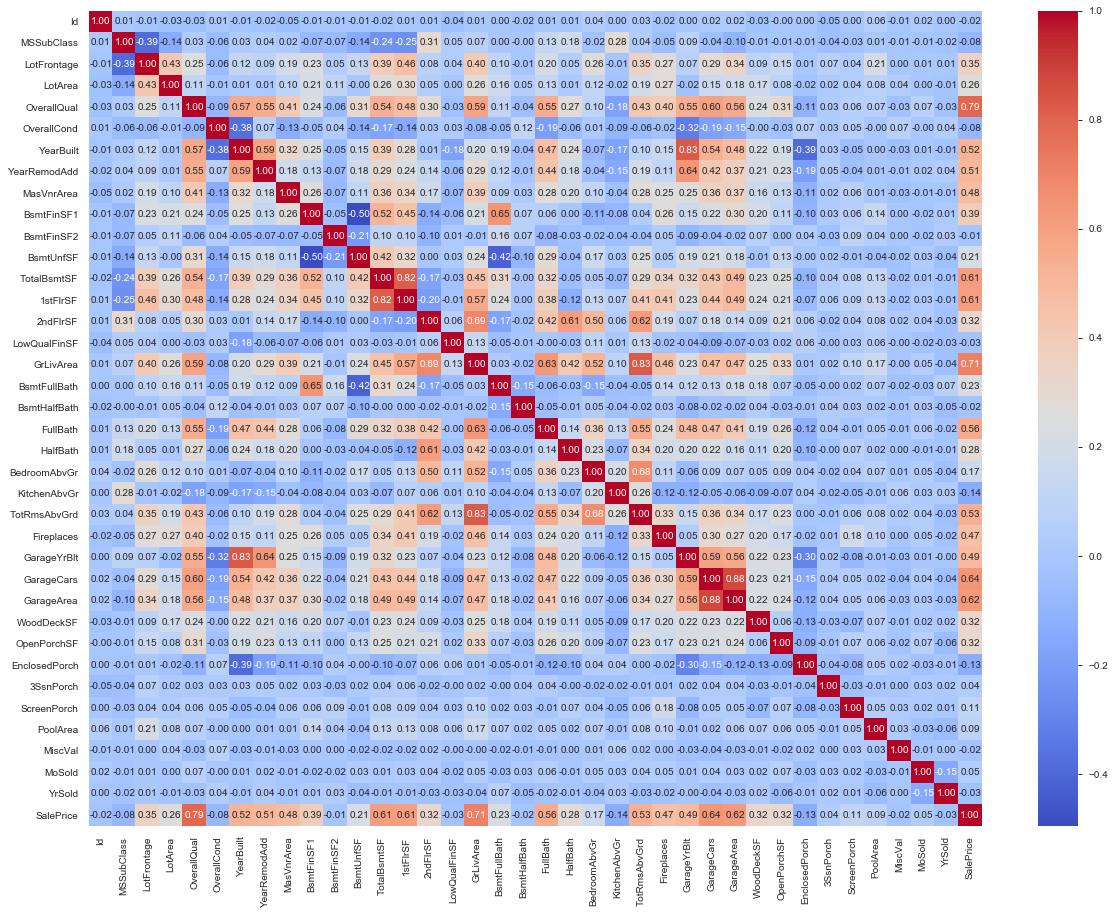

In [1239]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

In [1240]:
df1

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  No_years_old  No_years_after_remodel MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition
0             60        65.00     8450            7            5      196.00         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0           2         548           0           61              0          0            0         0        0       2     208500            17                       0       RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          No     Attchd          RFn         TA         TA          Y     No     No          No       WD        Normal
1             20        80.00     9600            6            8        0.00         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1           2         460         298            0              0          0            0         0        0       5     181500            44                       0       RL   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd          RFn         TA         TA          Y     No     No          No       WD        Normal
2             60        68.00    11250            7            5      162.00         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1           2         608           0           42              0          0            0         0        0       9     223500            19                       1       RL   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y     No     No          No       WD        Normal
3             70        60.00     9550            7            5        0.00         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1           3         642           0           35            272          0            0         0        0       2     140000           105                      55       RL   Pave    No 

# Onehot Encoding

In [1241]:
df1 = pd.get_dummies(df1, drop_first = True)

# Feauture Engineering

In [1242]:
feature = df1[df1.columns.difference(['SalePrice'])]
target = df1.SalePrice

# RFE

In [1243]:
rfe = RFE(RandomForestRegressor(), n_features_to_select = 15).fit(feature,target)

In [1244]:
list(feature.columns[rfe.get_support()])

['1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'No_years_old',
 'OpenPorchSF',
 'OverallQual',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

# Seleck KBest

In [1245]:
skb = SelectKBest(f_oneway, k = 15).fit(feature, target)

In [1246]:
list(feature.columns[skb.get_support()])

['Condition2_RRAe',
 'Condition2_RRAn',
 'ExterCond_Po',
 'Exterior1st_AsphShn',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior2nd_CBlock',
 'Exterior2nd_Other',
 'Functional_Sev',
 'HeatingQC_Po',
 'MiscFeature_TenC',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Utilities_NoSeWa']

# F-regression


In [1247]:
f_value, p_value = f_regression(feature, target)

f_reg = [(i,v,z) for i, v,z in itertools.zip_longest(feature.columns, f_value, ['%.3f' %p for p in p_value])]

In [1248]:
f_reg = pd.DataFrame(f_reg, columns = ['Feature', 'F_value', 'P_value'])
f_reg.sort_values(by = ['P_value'], ascending = True)['Feature'].head(15)

0                1stFlrSF
129         GarageQual_No
131         GarageQual_TA
132     GarageType_Attchd
134    GarageType_BuiltIn
136     GarageType_Detchd
137         GarageType_No
138             GrLivArea
139              HalfBath
127         GarageQual_Fa
140          HeatingQC_Fa
143          HeatingQC_TA
144          Heating_GasA
146          Heating_Grav
153     HouseStyle_2Story
Name: Feature, dtype: object

# Taking Final List

In [1249]:
 final_list = ['1stFlrSF',
               '2ndFlrSF',
               'BsmtFinSF1',
#               'BsmtUnfSF',
#               'GarageArea',
               'GarageCars',
               'LotArea',
#               'LotFrontage',
              'No_years_old',
               'OpenPorchSF',
               'OverallCond',
               'OverallQual',
               'TotalBsmtSF',
#               'WoodDeckSF',
#             'Condition2_RRAn',
#              'ExterCond_Po',
#              'Exterior1st_AsphShn',
#              'Exterior1st_ImStucc',
#              'Exterior2nd_Other',
#              'Functional_Sev',
#              'HeatingQC_Po',
#              'MiscFeature_TenC',
#              'PoolArea',
#              'RoofMatl_Membran',
#              'RoofMatl_Metal',
#              'RoofMatl_Roll',
#              'Utilities_NoSeWa',
#              'GarageQual_TA',
              'GarageType_Attchd',
#              'GarageType_BuiltIn',
              'GarageType_Detchd',
#             'GarageType_No',
              'GrLivArea',
#              'HalfBath',
#             'GarageQual_Fa',
#              'HeatingQC_Fa',
#              'HeatingQC_TA',
#              'Heating_GasA',
#             'Heating_Grav',
#             'HouseStyle_2Story'
            ]

x = feature[final_list]

# VIF

In [1250]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif.sort_values(by = ['vif_factor'], ascending = False)

vif_factor           features
12     1150.69          GrLivArea
0       710.69           1stFlrSF
1       142.84           2ndFlrSF
8        42.83        OverallQual
9        26.61        TotalBsmtSF
7        26.15        OverallCond
3        14.33         GarageCars
5         8.35       No_years_old
10        6.40  GarageType_Attchd
11        3.72  GarageType_Detchd
2         2.79         BsmtFinSF1
4         2.45            LotArea
6         1.74        OpenPorchSF

# Extra Tree Regressor

In [1251]:
model = ExtraTreesRegressor().fit(x, target)

In [1252]:
model.feature_importances_

array([0.05453981, 0.03902791, 0.03677042, 0.13675632, 0.02473702,
       0.08915577, 0.01712186, 0.01500653, 0.36128175, 0.05507118,
       0.02071117, 0.01461838, 0.13520187])

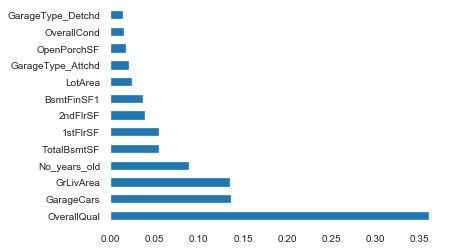

In [1253]:
pd.Series(model.feature_importances_, index = x.columns).sort_values(ascending = False).head(25).plot(kind = 'barh')
plt.show()

# Train Test Split

In [1254]:
x_train, x_test, y_train, y_test = train_test_split(x, target, random_state = 20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1095, 13) (365, 13) (1095,) (365,)


# Pre Model Building

In [1255]:
reg = LazyRegressor(verbose=0,ignore_warnings=False)
models,predictions = reg.fit(x_train, x_test, y_train, y_test)

 88%|████████████████████████████████████████████████████████████████████████▍         | 38/43 [00:12<00:01,  2.67it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:13<00:00,  3.18it/s]


In [1256]:
models

R-Squared      RMSE  Time Taken
Model                                                         
RandomForestRegressor               0.90  25507.47        1.37
ExtraTreesRegressor                 0.89  26327.62        1.08
GradientBoostingRegressor           0.89  26340.60        0.50
XGBRegressor                        0.89  26898.21        0.29
HistGradientBoostingRegressor       0.89  27052.77        2.30
BaggingRegressor                    0.88  27260.23        0.24
LGBMRegressor                       0.88  27348.06        0.32
PoissonRegressor                    0.86  29615.19        0.06
AdaBoostRegressor                   0.85  30805.64        0.52
KNeighborsRegressor                 0.85  31325.01        0.07
GammaRegressor                      0.83  33221.09        0.05
HuberRegressor                      0.82  33773.56        0.08
SGDRegressor                        0.82  34146.15        0.04
ExtraTreeRegressor                  0.82  34296.84        0.04
PassiveAggressiveRegressor          0.81  34628.12        0.16
RidgeCV                             0.81  34771.88        0.04
BayesianRidge                       0.81  34772.13        0.05
Ridge                               0.81  34781.63        0.04
Lars                                0.81  34786.08        0.05
LinearRegression                    0.81  34786.08        0.04
TransformedTargetRegressor          0.81  34786.08        0.04
Lasso                               0.81  34786.40        0.05
LassoLars                           0.81  34806.40        0.04
LassoCV                             0.81  34878.46        0.25
LassoLarsIC                         0.81  34899.93        0.04
DecisionTreeRegressor               0.81  34952.98        0.05
LarsCV                              0.81  35137.16        0.10
LassoLarsCV                         0.81  35137.16        0.09
ElasticNet                          0.79  36832.73        0.05
OrthogonalMatchingPursuitCV         0.79  37029.09        0.05
RANSACRegressor                     0.76  39451.38        0.12
TweedieRegressor                    0.75  39785.80        0.05
GeneralizedLinearRegressor          0.75  39785.80        0.05
OrthogonalMatchingPursuit           0.62  49257.10        0.03
ElasticNetCV                        0.08  76869.78        0.24
DummyRegressor                     -0.00  80293.38        0.04
NuSVR                              -0.01  80857.99        0.16
SVR                                -0.06  82552.09        0.21
KernelRidge                        -4.24 183872.16        0.12
LinearSVR                          -5.04 197365.41        0.04
MLPRegressor                       -5.05 197426.42        3.92
GaussianProcessRegressor         -115.65 867165.81        0.36

In [1257]:
predictions

R-Squared      RMSE  Time Taken
Model                                                         
RandomForestRegressor               0.90  25507.47        1.37
ExtraTreesRegressor                 0.89  26327.62        1.08
GradientBoostingRegressor           0.89  26340.60        0.50
XGBRegressor                        0.89  26898.21        0.29
HistGradientBoostingRegressor       0.89  27052.77        2.30
BaggingRegressor                    0.88  27260.23        0.24
LGBMRegressor                       0.88  27348.06        0.32
PoissonRegressor                    0.86  29615.19        0.06
AdaBoostRegressor                   0.85  30805.64        0.52
KNeighborsRegressor                 0.85  31325.01        0.07
GammaRegressor                      0.83  33221.09        0.05
HuberRegressor                      0.82  33773.56        0.08
SGDRegressor                        0.82  34146.15        0.04
ExtraTreeRegressor                  0.82  34296.84        0.04
PassiveAggressiveRegressor          0.81  34628.12        0.16
RidgeCV                             0.81  34771.88        0.04
BayesianRidge                       0.81  34772.13        0.05
Ridge                               0.81  34781.63        0.04
Lars                                0.81  34786.08        0.05
LinearRegression                    0.81  34786.08        0.04
TransformedTargetRegressor          0.81  34786.08        0.04
Lasso                               0.81  34786.40        0.05
LassoLars                           0.81  34806.40        0.04
LassoCV                             0.81  34878.46        0.25
LassoLarsIC                         0.81  34899.93        0.04
DecisionTreeRegressor               0.81  34952.98        0.05
LarsCV                              0.81  35137.16        0.10
LassoLarsCV                         0.81  35137.16        0.09
ElasticNet                          0.79  36832.73        0.05
OrthogonalMatchingPursuitCV         0.79  37029.09        0.05
RANSACRegressor                     0.76  39451.38        0.12
TweedieRegressor                    0.75  39785.80        0.05
GeneralizedLinearRegressor          0.75  39785.80        0.05
OrthogonalMatchingPursuit           0.62  49257.10        0.03
ElasticNetCV                        0.08  76869.78        0.24
DummyRegressor                     -0.00  80293.38        0.04
NuSVR                              -0.01  80857.99        0.16
SVR                                -0.06  82552.09        0.21
KernelRidge                        -4.24 183872.16        0.12
LinearSVR                          -5.04 197365.41        0.04
MLPRegressor                       -5.05 197426.42        3.92
GaussianProcessRegressor         -115.65 867165.81        0.36

# Model Building

In [1258]:
xgb = XGBRegressor(learning_rate=0.01, n_estimators=5500,
                       max_depth=3, min_child_weight=0,
                       gamma=0, subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror', nthread=-1,
                       scale_pos_weight=1,
                       reg_alpha=0.00006)

xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             n_estimators=5500, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             random_state=0, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method=None, validate_parameters=False,
             verbosity=None)

# Prediction

In [1259]:
result_train = pd.DataFrame()
result_test = pd.DataFrame()

result_train['Predicted'] = xgb.predict(x_train)
result_train['Actual'] = y_train

result_test['Predicted'] = xgb.predict(x_test)
result_test['Actual'] = y_test

# Accuracy

In [1260]:
print('Train Accuracy', r2_score(y_train, result_train.Predicted))
print('Test Accuracy', r2_score(y_test, result_test.Predicted))

Train Accuracy 0.9902432409952855
Test Accuracy 0.9035122496254984


In [1261]:
print('Train Error', np.sqrt(mean_squared_log_error(y_train,  result_train.Predicted)))
print('Test Error', np.sqrt(mean_squared_log_error(y_test,  result_test.Predicted)))

Train Error 0.056722157618429546
Test Error 0.1343419956977941


# Train Errors 

In [1262]:
train_error = result_train['Actual'] - result_train['Predicted']

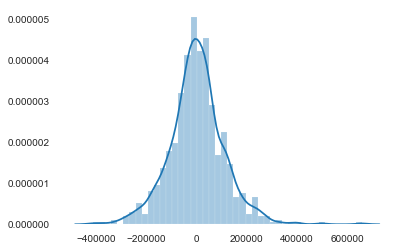

In [1263]:
sns.distplot(train_error)

# Test Errors 

In [1264]:
test_error = result_test['Actual'] - result_test['Predicted']

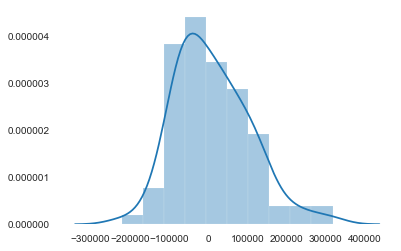

In [1265]:
sns.distplot(test_error)

> Here the errors are normally distributed

# Model validation
## Decile Analysis

In [1266]:
result_train['Decile'] = pd.qcut(result_train['Predicted'], 10, labels=False)
result_train.groupby('Decile').mean()

Predicted    Actual
Decile                     
0        88946.10 171985.18
1       116259.57 176704.88
2       128719.83 174139.79
3       140397.06 196770.12
4       153349.52 190960.47
5       170691.77 177295.04
6       188884.11 182368.31
7       212953.14 176625.58
8       254210.06 186089.18
9       353180.72 178851.29

In [1267]:
result_test['Decile'] = pd.qcut(result_test['Predicted'], 10, labels=False)
result_test.groupby('Decile').mean()

Predicted    Actual
Decile                     
0        90455.82 185253.25
1       120165.35 229653.33
2       134310.78 188992.31
3       145616.66 170000.00
4       157883.98 186437.50
5       173908.17 161971.43
6       190332.53 202000.00
7       214499.48 155709.09
8       242253.08 217687.50
9       341143.03 209066.67

# Predict the Sales Price in Test Dataset

In [1268]:
df = pd.read_csv('test.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition
0  1461          20       RH        80.00    11622   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None        0.00        TA        TA     CBlock       TA       TA           No          Rec      468.00          LwQ      144.00     270.00       882.00    GasA        TA          Y      SBrkr       896         0             0        896          0.00          0.00         1         0             2             1          TA             5        Typ           0         NaN     Attchd      1961.00          Unf        1.00      730.00         TA         TA          Y         140            0              0          0          120         0    NaN  MnPrv         NaN        0       6    2010       WD        Normal
1  1462          20       RL        81.00    14267   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace      108.00        TA        TA     CBlock       TA       TA           No          ALQ      923.00          Unf        0.00     406.00      1329.00    GasA        TA          Y      SBrkr      1329         0             0       1329          0.00          0.00         1         1             3             1          Gd             6        Typ           0         NaN     Attchd      1958.00          Unf        1.00      312.00         TA         TA          Y         393           36              0          0            0         0    NaN    NaN        Gar2    12500       6    2010       WD        Normal
2  1463          60       RL        74.00    13830   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None        0.00        TA        TA      PConc       Gd       TA           No          GLQ      791.00          Unf        0.00     137.00       928.00    GasA        Gd          Y      SBrkr       928       701             0       1629          0.00          0.00         2         1             3             1          TA             6        Typ           1          TA     Attchd      1997.00          Fin        2.00      482.00         TA         TA          Y         212           34              0          0            0         0    NaN  MnPrv         NaN        0       3    2010       WD        Normal
3  1464          60       RL        78.00     9978   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            6       1998          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace       20.00        TA        TA      PConc       TA       TA           No          GLQ      602.00          Unf        0.00     324.00       926.00    GasA        Ex          Y      

In [1269]:
df.shape

(1459, 80)

In [1272]:
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(exclude = 'object')

df_num.drop(['Id'], axis = 1, inplace = True)

df_num.drop(['GarageYrBlt'], axis = 1, inplace = True)

def missing(x):
    x = x.fillna(x.median())
    return x

df_num = df_num.apply(missing)

for i in df_cat.columns:
    if i == 'Electrical':
        continue
    df_cat[i] = df_cat[i].fillna('No')
    
df_cat['Electrical'] = df_cat['Electrical'].fillna('Mix')

df_num['No_years_old'] = dt.today().year - pd.to_datetime(df_num['YearBuilt'], format = '%Y').dt.year

df_num['No_years_after_remodel'] = df_num['YearRemodAdd'] - df_num['YearBuilt']

# Drop unwanted columns

df_num.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis = 1, inplace = True)



df1 = pd.concat([df_num, df_cat], axis = 1)

df1 = pd.get_dummies(df1, drop_first = True)

In [1273]:
df1 = df1[final_list]

In [1274]:
list(xgb.predict(df1))

[127539.76,
 172787.3,
 181155.1,
 192922.53,
 186233.05,
 172208.31,
 176870.67,
 165619.11,
 182289.17,
 123858.89,
 201983.88,
 93538.57,
 93468.02,
 154147.3,
 136065.6,
 371744.2,
 268690.8,
 293772.1,
 288642.47,
 448691.72,
 319091.88,
 214721.1,
 158432.75,
 166314.16,
 175625.78,
 201166.02,
 321434.8,
 227167.55,
 201784.36,
 197019.34,
 190385.11,
 94297.46,
 196592.3,
 298339.75,
 298936.5,
 220895.66,
 169938.17,
 158520.83,
 158933.88,
 152820.56,
 175514.58,
 153680.47,
 300722.12,
 231429.75,
 227489.88,
 197851.64,
 245316.6,
 200013.78,
 174160.86,
 146098.92,
 146563.72,
 175385.72,
 149779.97,
 196910.14,
 212801.48,
 164458.12,
 169750.28,
 143336.83,
 217049.22,
 130529.06,
 139696.17,
 161371.6,
 117590.46,
 126611.695,
 120713.98,
 122231.51,
 93639.54,
 139248.62,
 138721.53,
 179414.64,
 100045.695,
 103442.05,
 155149.86,
 126860.61,
 163970.92,
 122450.17,
 68177.445,
 191112.0,
 185123.3,
 86576.15,
 160395.8,
 136398.4,
 231215.1,
 93447.66,
 115657.1,
 11

In [1275]:
submission = pd.DataFrame({'Id' : df['Id'], 'SalePrice': xgb.predict(df1)})

In [1276]:
submission.to_csv('submission.csv')